In [1]:
pip install pandas numpy matplotlib seaborn chess.pgn scikit-learn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement chess.pgn (from versions: none)
ERROR: No matching distribution found for chess.pgn


In [2]:
pip install python-chess


Note: you may need to restart the kernel to use updated packages.


In [1]:
import chess.pgn  # ✅ this works after installing python-chess


In [3]:
import chess.pgn
import pandas as pd

# Replace this with your actual PGN file path
pgn_path = "dataset3.pgn"

games = []

with open(pgn_path, encoding='utf-8') as pgn:
    while True:
        game = chess.pgn.read_game(pgn)
        if game is None:
            break

        headers = game.headers
        try:
            games.append({
                "White": headers.get("White"),
                "Black": headers.get("Black"),
                "WhiteElo": int(headers.get("WhiteElo", 0)),
                "BlackElo": int(headers.get("BlackElo", 0)),
                "Result": headers.get("Result"),
                "TimeControl": headers.get("TimeControl"),
                "ECO": headers.get("ECO"),
                "PlyCount": int(headers.get("PlyCount", 0)),
                "Date": headers.get("Date")
            })
        except Exception:
            continue

# Convert to a DataFrame
df = pd.DataFrame(games)
df.head()


,White,Black,WhiteElo,BlackElo,Result,TimeControl,ECO,PlyCount,Date
0,Moondance,morlok,1702,1429,1-0,180+0,A84,77,2025.05.30
1,JozeG,eisinger,1852,1659,1-0,180+0,D01,71,2025.05.30
2,ChequeMade,Oak,1677,1559,1-0,180+0,C23,75,2025.05.30
3,Crown,haberdashery,1569,1674,1-0,300+0,D06,53,2025.05.30
4,defensamaya,Mentallytough,1521,1515,0-1,180+0,A00,68,2025.05.30


In [4]:
df.to_csv("chess_games_cleaned.csv", index=False)


In [5]:
import pandas as pd

df = pd.read_csv("chess_games_cleaned.csv")
df.head()


,White,Black,WhiteElo,BlackElo,Result,TimeControl,ECO,PlyCount,Date
0,Moondance,morlok,1702,1429,1-0,180+0,A84,77,2025.05.30
1,JozeG,eisinger,1852,1659,1-0,180+0,D01,71,2025.05.30
2,ChequeMade,Oak,1677,1559,1-0,180+0,C23,75,2025.05.30
3,Crown,haberdashery,1569,1674,1-0,300+0,D06,53,2025.05.30
4,defensamaya,Mentallytough,1521,1515,0-1,180+0,A00,68,2025.05.30


In [6]:
import pandas as pd

# Load your saved CSV
df = pd.read_csv("chess_games_cleaned.csv")

# Drop rows with missing or 0 Elo values
df = df[(df["WhiteElo"] > 0) & (df["BlackElo"] > 0)]

# Ensure numeric columns are correct
df["WhiteElo"] = pd.to_numeric(df["WhiteElo"], errors="coerce")
df["BlackElo"] = pd.to_numeric(df["BlackElo"], errors="coerce")
df["PlyCount"] = pd.to_numeric(df["PlyCount"], errors="coerce")
df.dropna(inplace=True)

# Add Elo difference
df["EloDiff"] = df["WhiteElo"] - df["BlackElo"]

# View result
df.head()


,White,Black,WhiteElo,BlackElo,Result,TimeControl,ECO,PlyCount,Date,EloDiff
0,Moondance,morlok,1702,1429,1-0,180+0,A84,77,2025.05.30,273
1,JozeG,eisinger,1852,1659,1-0,180+0,D01,71,2025.05.30,193
2,ChequeMade,Oak,1677,1559,1-0,180+0,C23,75,2025.05.30,118
3,Crown,haberdashery,1569,1674,1-0,300+0,D06,53,2025.05.30,-105
4,defensamaya,Mentallytough,1521,1515,0-1,180+0,A00,68,2025.05.30,6


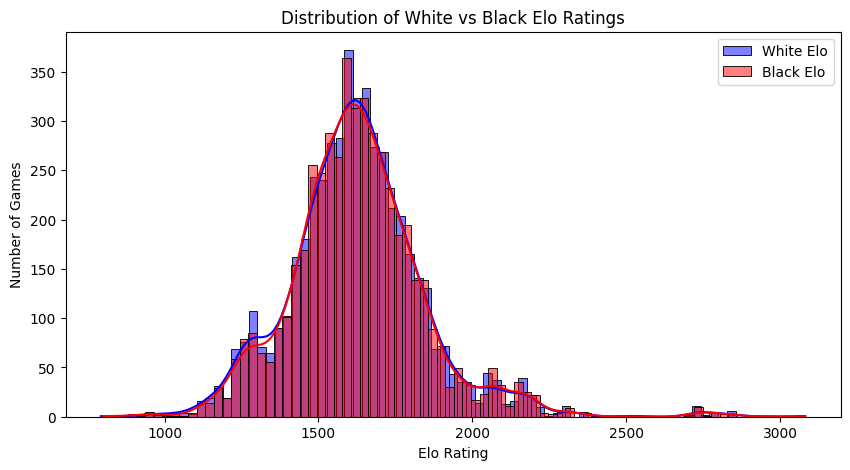

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["WhiteElo"], color="blue", label="White Elo", kde=True)
sns.histplot(df["BlackElo"], color="red", label="Black Elo", kde=True)
plt.legend()
plt.title("Distribution of White vs Black Elo Ratings")
plt.xlabel("Elo Rating")
plt.ylabel("Number of Games")
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_7852\2529525952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Result", palette="Set2")


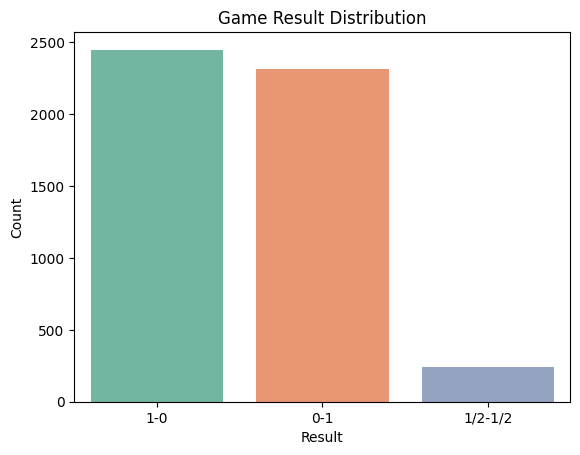

In [8]:
sns.countplot(data=df, x="Result", palette="Set2")
plt.title("Game Result Distribution")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_7852\3757568927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Result", y="EloDiff", palette="Set3")


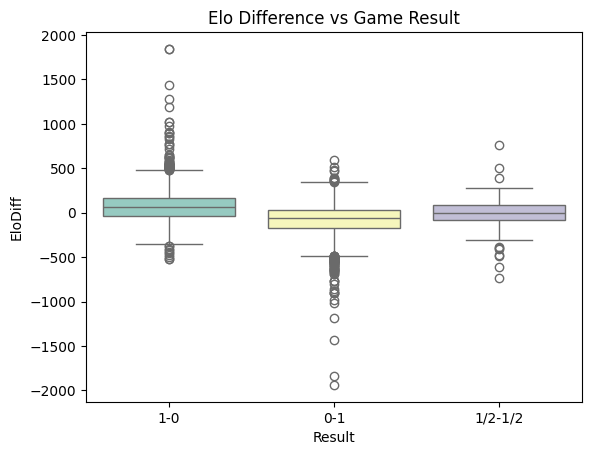

In [9]:
sns.boxplot(data=df, x="Result", y="EloDiff", palette="Set3")
plt.title("Elo Difference vs Game Result")
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_7852\2524664185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.index, y=top_openings.values, palette="viridis")


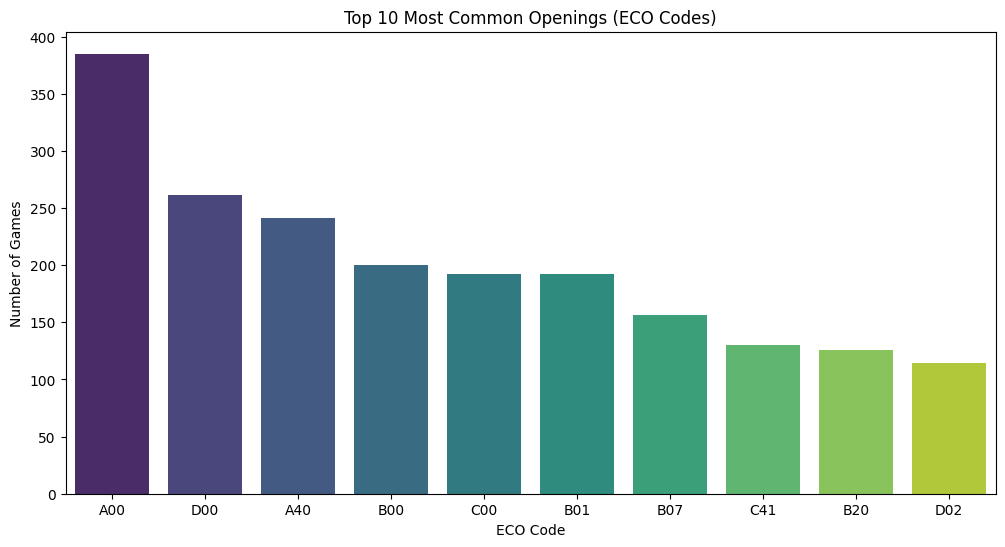

In [10]:
plt.figure(figsize=(12,6))
top_openings = df["ECO"].value_counts().head(10)
sns.barplot(x=top_openings.index, y=top_openings.values, palette="viridis")
plt.title("Top 10 Most Common Openings (ECO Codes)")
plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.show()


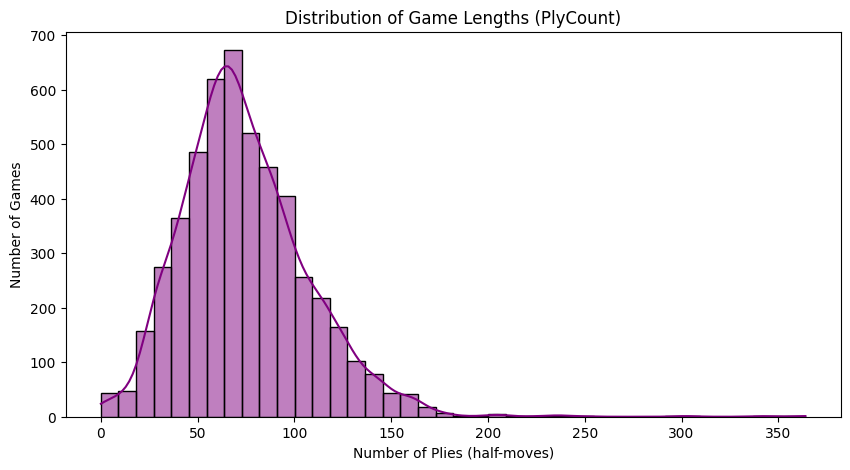

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["PlyCount"], bins=40, kde=True, color="purple")
plt.title("Distribution of Game Lengths (PlyCount)")
plt.xlabel("Number of Plies (half-moves)")
plt.ylabel("Number of Games")
plt.show()


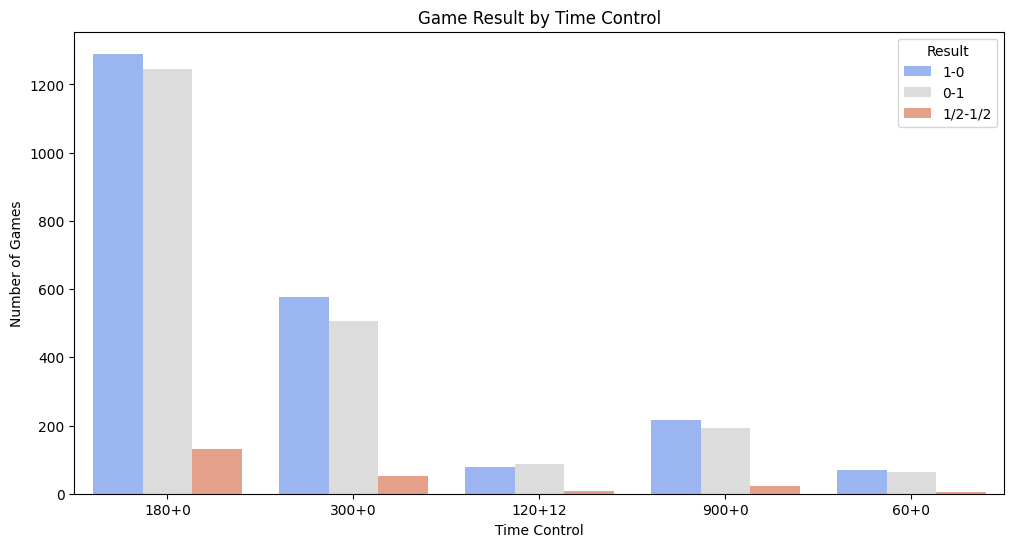

In [12]:
# Show top 5 time controls only for clarity
top_controls = df["TimeControl"].value_counts().head(5).index
filtered = df[df["TimeControl"].isin(top_controls)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered, x="TimeControl", hue="Result", palette="coolwarm")
plt.title("Game Result by Time Control")
plt.xlabel("Time Control")
plt.ylabel("Number of Games")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Define target: Binary – 1 if White wins, 0 otherwise
df["WhiteWin"] = df["Result"].apply(lambda x: 1 if x == "1-0" else 0)

# 2. Encode categorical variables: ECO and TimeControl
le_eco = LabelEncoder()
le_time = LabelEncoder()

df["ECO_enc"] = le_eco.fit_transform(df["ECO"])
df["TimeControl_enc"] = le_time.fit_transform(df["TimeControl"])

# 3. Select features
features = ["WhiteElo", "BlackElo", "EloDiff", "PlyCount", "ECO_enc", "TimeControl_enc"]
X = df[features]
y = df["WhiteWin"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.683

Confusion Matrix:
 [[350 156]
 [161 333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       506
           1       0.68      0.67      0.68       494

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.68      0.68      1000



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
# Predict
y_pred = model_lr.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.68
Confusion Matrix:
[[350 156]
 [161 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       506
           1       0.68      0.67      0.68       494

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.68      0.68      1000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.66
Confusion Matrix:
[[354 152]
 [192 302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       506
           1       0.67      0.61      0.64       494

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000

